In [53]:
# Imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

Splitting the Dataset

- Training Set: Models the parameters
- Validation Set: Monitors overfitting
- Test Set: Evaluate final performance

In [ ]:
data_dir = './data'
print("Current working directory:", os.getcwd())

# Image generation with data augmentation for overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,          
    rotation_range=10,       
    width_shift_range=0.05,  
    height_shift_range=0.05, 
    zoom_range=0.1,          
    validation_split=0.2     
)    


train_gen = train_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Validation
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

val_gen = val_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Current working directory: c:\Users\Zaine\Documents\VSCode Projects\Brain Tumor MRI Image Classifier
Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [55]:
# CNN Model
model = models.Sequential([
    # Block 1: Learn low-level features like edges
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Block 2: Learn slightly more complex features
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Block 3: Learn mid-level features
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Block 4: Learn higher-level, abstract features with more filters
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten converts the 2D feature maps into a 1D vector
    layers.Flatten(),
    
    # Dense layer to learn complex combinations of the features
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout helps reduce overfitting by randomly deactivating 50% of the neurons
    
    # Output layer for binary classification: outputs probability between 0 and 1
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,107,265 (19.48 MB)

 Trainable params: 5,107,265 (19.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=40 # Train 40 times
)

Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - accuracy: 0.5414 - loss: 0.9150 - val_accuracy: 0.7200 - val_loss: 0.6788
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.6852 - loss: 0.6798 - val_accuracy: 0.7600 - val_loss: 0.6300
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step - accuracy: 0.7447 - loss: 0.6300 - val_accuracy: 0.7800 - val_loss: 0.4772
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.7500 - loss: 0.5370 - val_accuracy: 0.7800 - val_loss: 0.5051
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step - accuracy: 0.7302 - loss: 0.5594 - val_accuracy: 0.7800 - val_loss: 0.4887
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 295ms/step - accuracy: 0.7461 - loss: 0.5432 - val_accuracy: 0.7800 - val_loss: 0.4945
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step - accuracy: 0.7849 - loss: 0.5000 - val_accuracy: 0.7800 - val_loss: 0.4990
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step - accuracy: 0.7964 - loss: 0.5142 - val_accuracy: 0.7800 - val_loss:

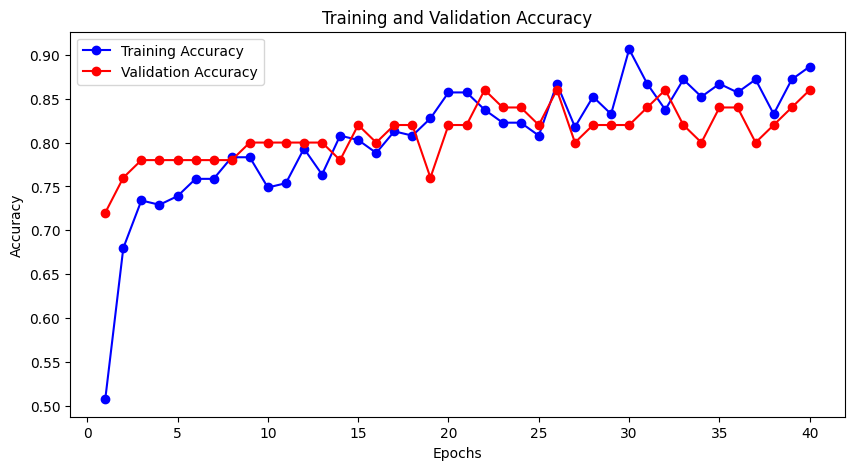

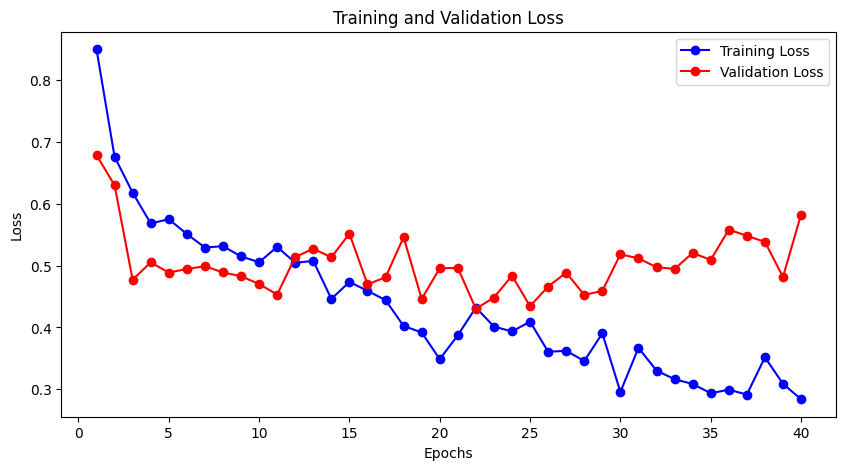

In [ ]:
import matplotlib.pyplot as plt

# Evaluation of the CNN model using matplotlib.

# Extract history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
